In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:

img_array=cv2.imread("train/0/Training_3908.jpg")

In [5]:

img_array.shape

(48, 48, 3)

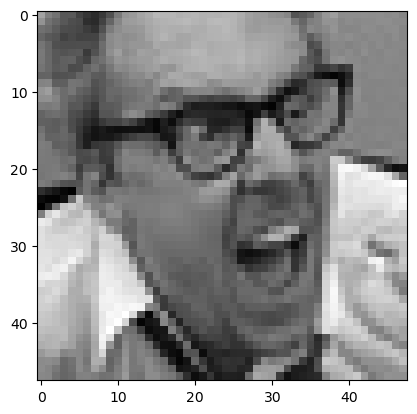

In [6]:
plt.imshow(img_array)

In [7]:
Traindata="train/"


In [8]:
classes=["0","1","2","3","4","5","6"]

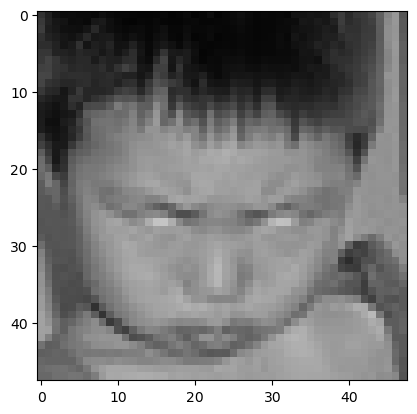

In [9]:
for category in classes:
    path=os.path.join(Traindata,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        
    

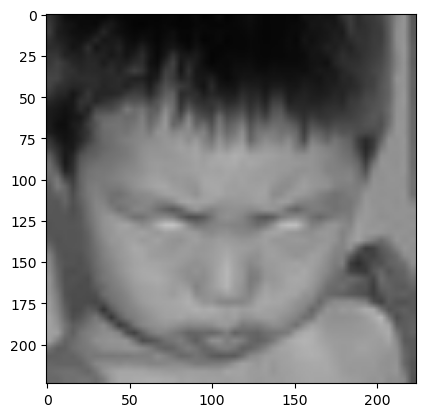

In [10]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [89]:
new_array.shape

(224, 224, 3)

# Converting Images to array

In [11]:
training_data=[]
def create_training_data():
    for category in classes:
        path=os.path.join(Traindata,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
        
    

In [12]:
create_training_data()

In [92]:
print(len(training_data))

6431


In [13]:
import random
random.shuffle(training_data)

In [14]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,3)

In [15]:
x.shape

(6431, 224, 224, 3)

In [16]:
for i in range(0,6431):
    x[i]=x[i]/255.0

# Transfer learning

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [98]:
model= tf.keras.applications.MobileNetV2()

In [99]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [100]:
base_input=model.layers[0].input

In [101]:
base_output=model.layers[-2].output

In [102]:
final_output=layers.Dense(128)(base_output)
final_op=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_op)
final_op=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_op)

In [103]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [104]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [18]:
x=np.array(x)
y=np.array(y)

In [ ]:
new_model.fit(x,y,epochs=25)

In [108]:
new_model.save('mobnet3.h5')

In [109]:
hr=cv2.imread("angrykid.jpg")
hr.shape

(183, 275, 3)

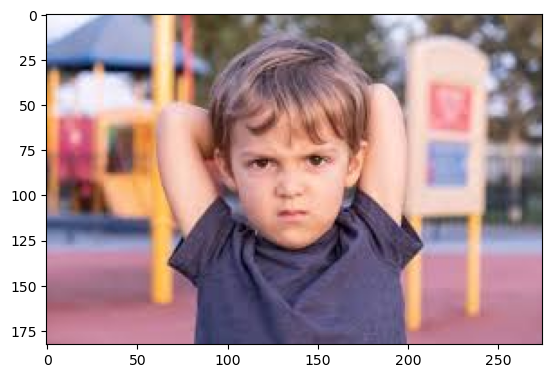

In [110]:
plt.imshow(cv2.cvtColor(hr,cv2.COLOR_BGR2RGB))

In [8]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [113]:
gray=cv2.cvtColor(hr,cv2.COLOR_BGR2GRAY)

In [118]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=hr[y:y+h,x:x+w]
    cv2.rectangle(hr,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex + ew]

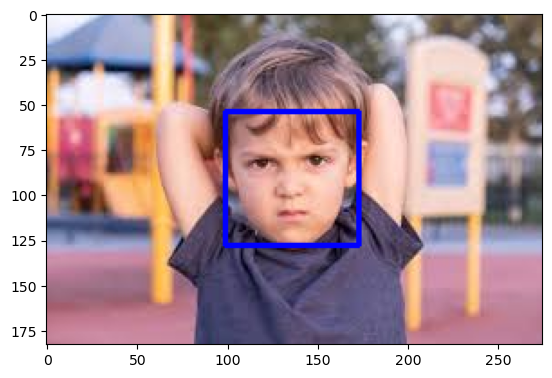

In [120]:
plt.imshow(cv2.cvtColor(hr,cv2.COLOR_BGR2RGB))

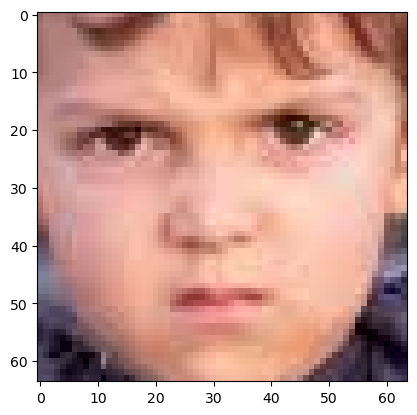

In [121]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [1]:
import tensorflow as tf

In [2]:
#mod=tf.keras.models.load_model('capmodfour.h5')

In [2]:
import cv2
import numpy as np

In [5]:
mod=tf.keras.models.load_model('mobnet3.h5',compile=False)

# Live Camera Demo

In [6]:
import cv2
import numpy as np
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
Predictions=np.zeros(shape=(1,1000))
#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get  the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small paddiing of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    
                final_image = cv2.resize(face_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = final_image/255.0

                font = cv2.FONT_HERSHEY_SIMPLEX

                Predictions = mod.predict(final_image)
                #print(Predictions.shape)

                
                print(np.argmax(Predictions))
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    for x,y,w,h in faces:
        if (np.argmax(Predictions)==0):
            status = "Angry"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions)==1):
            status = "Disgust"

            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions)==2):
            status = "Fear"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions)==3):
            status = "Happy"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions)==4):
            status = "Neutral"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions)==5):
            status = "Sad"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
        if (np.argmax(Predictions)==6):
            status = "Surprise"
            print(status)
            x1, y1, w1, h1 = 0,0,175,75
    # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
            cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))


    cv2.imshow("Face Emotion Recognition", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
Angry
Face not detected
Angry
1/1 [==============================] - 1s 1s/step
4
Neutral
1/1 [==============================] - 0s 40ms/step
4
Neutral
1/1 [==============================] - 0s 49ms/step
4
Neutral
1/1 [==============================] - 0s 51ms/step
4
Neutral
1/1 [==============================] - 0s 41ms/step
4
Neutral
1/1 [==============================] - 0s 40ms/step
5
Sad
1/1 [==============================] - 0s 44ms/step
4
Neutral
1/1 [==============================] - 0s 41ms/step
3
Happy
1/1 [==============================] - 0s 51ms/step
4
Neutral
1/1 [==============================] - 0s 50ms/step
4
Neutral
Face not detected
Neutral
1/1 [==============================] - 0s 47ms/step
4
Neutral
1/1 [==============================] - 0s 49ms/step
4
Neutral
1/1 [==============================] - 0s 41ms/step
4
Neutral
1/1 [==============================] - 0s 40ms/step
4
Neutral
1/1 [==============================] - 0s 35ms/step
4
Neutral
1/1 